In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Given a DataFrame from this data. **Do not change this cell!
# Run this cell to load the data.
d = {'category':['citrus','flower','flower','succulent','flower','citrus','vegetable','vegetable','succulent'],\
     'num_in_stock':[19,14,23,30,144,10,345,26,27],\
     'edible':[True,False,True,False,False,True,True,True,False],\
     'decorative': [False,True,True,True,True,False,False,True,True],\
     'unneeded':[3.44,-4.56,3.26,7.32,79.234,-453,445,995,0.48]}
plants = pd.DataFrame(d,index=['Lemon','Camelia','Lavender','Jade','Rose','Lime','Tomato','Flowering Kale','Aeonium Sunburst'])
plants

,category,num_in_stock,edible,decorative,unneeded
Lemon,citrus,19,True,False,3.440
Camelia,flower,14,False,True,-4.560
Lavender,flower,23,True,True,3.260
Jade,succulent,30,False,True,7.320
Rose,flower,144,False,True,79.234
Lime,citrus,10,True,False,-453.000
Tomato,vegetable,345,True,False,445.000
Flowering Kale,vegetable,26,True,True,995.000
Aeonium Sunburst,succulent,27,False,True,0.480


In [2]:
# Run this to see the data types of the columns of this data frame.
plants.dtypes

,0
category,object
num_in_stock,int64
edible,bool
decorative,bool
unneeded,float64


In [3]:
# One column is not needed (and named "unneeded"). Permanently remove
# this column from the plants data without including the code "plants =..."

del plants['unneeded']
print(plants)

                   category  num_in_stock  edible  decorative
Lemon                citrus            19    True       False
Camelia              flower            14   False        True
Lavender             flower            23    True        True
Jade              succulent            30   False        True
Rose                 flower           144   False        True
Lime                 citrus            10    True       False
Tomato            vegetable           345    True       False
Flowering Kale    vegetable            26    True        True
Aeonium Sunburst  succulent            27   False        True


In [4]:
# Display the entire row only for plants that are both edible and decorative.
# Use DataFrame.loc attribute to access a particular cell in the given Dataframe using the index and column labels.

print(plants.loc[(plants['edible'] == True) & (plants['decorative'] == True)])

                 category  num_in_stock  edible  decorative
Lavender           flower            23    True        True
Flowering Kale  vegetable            26    True        True


In [5]:
# Display the total number of plants in stock for each category.

print(plants.groupby('category')['num_in_stock'].sum())
plants_category = pd.Series(plants.groupby('category')['num_in_stock'].sum(), name='count').reset_index()
print(type(plants_category))
plants_category

category
citrus        29
flower       181
succulent     57
vegetable    371
Name: num_in_stock, dtype: int64
<class 'pandas.core.frame.DataFrame'>


,category,count
0,citrus,29
1,flower,181
2,succulent,57
3,vegetable,371


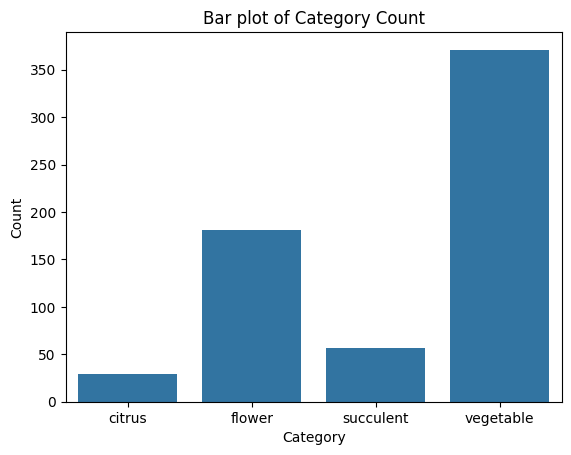

In [6]:
#plt.figure(figsize = (15,8)) # Use the matplotlib.pyplot.figure() Function to Change the Size of a Seaborn Plot
ax = sns.barplot(x='category', y='count', data=plants_category)
ax.set_ylabel("Count")
ax.set_xlabel("Category")
ax.set_title("Bar plot of Category Count")
plt.show()

In [7]:
# Get the total number of plants in stock for the plant names that start with "L".
# This one is a challenge

index = plants.index
print(index)

def condition(x):
  return x.startswith('L')

conditioned_index = [idx for idx, element in enumerate(plants.index) if condition(element)]


print(conditioned_index)

print(plants.iloc[conditioned_index])

print("Total: ", plants.iloc[conditioned_index]['num_in_stock'].sum())

Index(['Lemon', 'Camelia', 'Lavender', 'Jade', 'Rose', 'Lime', 'Tomato',
       'Flowering Kale', 'Aeonium Sunburst'],
      dtype='object')
[0, 2, 5]
         category  num_in_stock  edible  decorative
Lemon      citrus            19    True       False
Lavender   flower            23    True        True
Lime       citrus            10    True       False
Total:  52


In [8]:
# explain: conditioned_index = [idx for idx, element in enumerate(plants.index) if condition(element)]
print(plants.index) # i.e Index
conditioned_index2 = []
for index in plants.index:
  if index.startswith('L') == True:
    print(f'{index} - yes')
    conditioned_index2.append(index)
  else:
    print(f'{index} - no')

print(conditioned_index2)

Index(['Lemon', 'Camelia', 'Lavender', 'Jade', 'Rose', 'Lime', 'Tomato',
       'Flowering Kale', 'Aeonium Sunburst'],
      dtype='object')
Lemon - yes
Camelia - no
Lavender - yes
Jade - no
Rose - no
Lime - yes
Tomato - no
Flowering Kale - no
Aeonium Sunburst - no
['Lemon', 'Lavender', 'Lime']
